### Preprocessing data and analyst

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../data/hepatotoxicity_ALT_KlekFP_ready_set_after_conversion.csv", header=0, index_col=False)

In [3]:
df.head()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,32.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,44.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Columns: 4861 entries, ALT to KRFP4860
dtypes: float64(4861)
memory usage: 3.6 MB


In [5]:
df.describe()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
count,98.000000,98.000000,98.000000,98.0,98.0,98.0,98.0,98.0,98.0,98.0,...,98.0,98.000000,98.0,98.0,98.0,98.000000,98.0,98.0,98.0,98.0
mean,47.119898,0.693878,0.418367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.051020,0.0,0.0,0.0,0.051020,0.0,0.0,0.0,0.0
std,45.294039,0.463251,0.495827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.221171,0.0,0.0,0.0,0.221171,0.0,0.0,0.0,0.0
min,1.510000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,29.775000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,36.300000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,49.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,273.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0


In [6]:
columns = list(df.columns.values)
columns.remove('ALT')

### Min and max values in row w/o ALT's

In [7]:
df[columns].sum(axis=1).min()

30.0

In [8]:
df[columns].sum(axis=1).max()

128.0

### Min and max values in column w/o ALT's 

In [9]:
df[columns].sum(axis=0).min()

0.0

In [10]:
df[columns].sum(axis=0).max()

98.0

In [11]:
sum_col = df[columns].sum(axis=0)
print (sum_col)

KRFP1       68.0
KRFP2       41.0
KRFP3        0.0
KRFP4        0.0
KRFP5        0.0
            ... 
KRFP4856     5.0
KRFP4857     0.0
KRFP4858     0.0
KRFP4859     0.0
KRFP4860     0.0
Length: 4860, dtype: float64


In [12]:
zeros_col = list(dict((k, v) for (k, v) in sum_col.items() if v == 0.0).keys())

In [13]:
len(zeros_col)

4461

In [14]:
number_of_rows=98
ones_col = list(dict((k, v) for (k, v) in sum_col.items() if v == number_of_rows).keys())

In [15]:
ones_col

['KRFP2975']

### Delete zeros columns from dataframe

In [16]:
df.drop(columns=zeros_col, inplace=True)

### Delete ones columns from dataframe

In [17]:
df.drop(columns=ones_col, inplace=True)

In [18]:
df.head()

,ALT,KRFP1,KRFP2,KRFP14,KRFP16,KRFP17,KRFP18,KRFP20,KRFP34,KRFP45,...,KRFP4810,KRFP4811,KRFP4813,KRFP4820,KRFP4829,KRFP4830,KRFP4836,KRFP4843,KRFP4852,KRFP4856
0,32.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,44.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='ALT', ylabel='Count'>

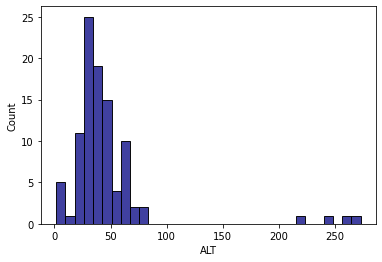

In [19]:
sns.histplot(data = df['ALT'],
             color = 'navy')

### Map all values from ALT's column by log

In [20]:
df['ALT'] = np.log1p(df['ALT'])

<AxesSubplot:xlabel='ALT', ylabel='Count'>

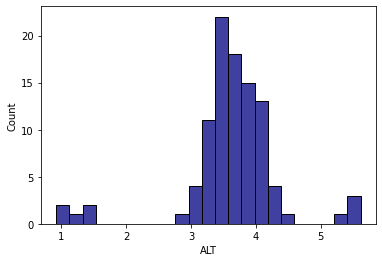

In [21]:
sns.histplot(data = df['ALT'],
             color = 'navy')

In [22]:
df['ALT'].min()

0.9202827531436926

In [23]:
df['ALT'].max()

5.6131281063880705

### Save to file

In [24]:
df.to_csv("../data/hepatotoxicity_ALT_KlekFP_preprocessing_and_analyst.csv", index = False)